<a href="https://www.kaggle.com/code/datascientistsohail/tpgs-aug2022?scriptVersionId=103573664" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn import decomposition
from sklearn import preprocessing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-aug-2022/train.csv
/kaggle/input/tabular-playground-series-aug-2022/test.csv


In [2]:
sample_submission = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/sample_submission.csv')

In [3]:
sample_submission.head()

,id,failure
0,26570,0.0
1,26571,0.0
2,26572,0.0
3,26573,0.0
4,26574,0.0


In [4]:
data = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/train.csv')
test_data = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/test.csv')

In [5]:
print('data set shape: ', data.shape)
data.head()

data set shape:  (26570, 26)


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [6]:
test_data.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


<AxesSubplot:>

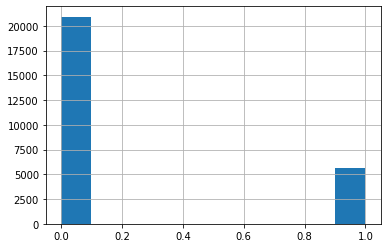

In [7]:
data.failure.hist()

From the above histogram of the target, it is known that the it is a classification problem

In [8]:
data.isnull().sum().sum()

20273

There exist null values in the training set lets whether there are null values in the test data. 

In [9]:
test_data.isnull().sum().sum()

15709

There are also null values in the test data set

To know which columns are missing in the training and test data by following code. 

In [10]:
y = data.failure
X = data.drop(['failure','id'], axis =1 )
X.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885


In [11]:
del data

In [12]:
test_data = test_data.drop(['id'], axis =1 )

In [13]:
test_data.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [14]:
# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

Setting the X and y data by droping the target (in this data 'failure' column). 

In [15]:
print('X_train_full :', X_train_full.shape)
X_train_full.head()

X_train_full : (21256, 24)


,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
19456,D,126.25,material_7,material_5,6,6,9,15,6,17.905,...,19.309,13.169,15.618,19.998,9.799,14.097,17.106,15.941,15.215,801.669
17985,D,109.07,material_7,material_5,6,6,8,9,6,17.196,...,17.987,NaN,18.032,20.019,9.666,16.398,15.609,15.625,16.148,321.386
16936,D,149.87,material_7,material_5,6,6,13,7,10,16.758,...,18.604,10.946,16.912,18.001,10.679,14.246,16.733,15.783,16.344,NaN
6616,B,102.74,material_5,material_5,8,8,2,7,8,15.647,...,18.368,10.403,16.799,NaN,10.436,17.396,17.912,NaN,14.290,588.786
6925,B,162.03,material_5,material_5,8,8,7,12,14,16.399,...,19.939,9.799,13.720,20.386,12.075,12.223,NaN,15.674,13.649,506.357


Recognizing columns with missing values

In [16]:
cols_with_missing = [col for col in X_train_full.columns if X_train_full[col].isnull().any()]

print("Columns with missing values :", cols_with_missing)

Columns with missing values : ['loading', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']


Recognizing the categorical columns and numerical columns

In [17]:
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

print('categorical columns :', categorical_cols)
print('numerical columns :', numerical_cols)

categorical columns : ['product_code', 'attribute_0', 'attribute_1']
numerical columns : ['loading', 'attribute_2', 'attribute_3', 'measurement_0', 'measurement_1', 'measurement_2', 'measurement_3', 'measurement_4', 'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17']


In [18]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = test_data[my_cols].copy()

In [19]:
print('X_train shape: ', X_train.shape)
X_train.head()

X_train shape:  (21256, 24)


,product_code,attribute_0,attribute_1,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
19456,D,material_7,material_5,126.25,6,6,9,15,6,17.905,...,19.309,13.169,15.618,19.998,9.799,14.097,17.106,15.941,15.215,801.669
17985,D,material_7,material_5,109.07,6,6,8,9,6,17.196,...,17.987,NaN,18.032,20.019,9.666,16.398,15.609,15.625,16.148,321.386
16936,D,material_7,material_5,149.87,6,6,13,7,10,16.758,...,18.604,10.946,16.912,18.001,10.679,14.246,16.733,15.783,16.344,NaN
6616,B,material_5,material_5,102.74,8,8,2,7,8,15.647,...,18.368,10.403,16.799,NaN,10.436,17.396,17.912,NaN,14.290,588.786
6925,B,material_5,material_5,162.03,8,8,7,12,14,16.399,...,19.939,9.799,13.720,20.386,12.075,12.223,NaN,15.674,13.649,506.357


In [20]:
print('X_test shape: ', X_test.shape)
X_test.head()

X_test shape:  (20775, 24)


,product_code,attribute_0,attribute_1,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,F,material_5,material_6,119.57,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,F,material_5,material_6,113.51,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,F,material_5,material_6,112.16,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,F,material_5,material_6,112.72,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,F,material_5,material_6,208.00,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


### Defining the preprocessing steps
imputes missing values in numerical data, and imputes missing values and applies a one-hot encoding to categorical data.

In [21]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['product_code', 'attribute_0', 'attribute_1']


In [22]:

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index
OH_cols_test.index = test_data.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis =1)


In [23]:
OH_X_test.shape

(20775, 31)

Checking for null values in OH_X_train (one hot encoded data set dealing categorical columns):

In [24]:
print("the numer of columns with Null values :", OH_X_train.isnull().sum().sum())

the numer of columns with Null values : 16106


Now we will apply the Simple Imputer technique for dealing with null values in OH_X_train data set.

In [25]:
# Imputation
my_imputer = SimpleImputer(strategy = "mean")
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(OH_X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(OH_X_valid))
imputed_X_test = pd.DataFrame(my_imputer.transform(OH_X_test))

# Imputation removed column names; put them back
imputed_X_train.columns = OH_X_valid.columns
imputed_X_valid.columns = OH_X_valid.columns
imputed_X_test.columns = OH_X_test.columns

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [26]:
imputed_X_train.head()

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,0,1,2,3,4,5,6,7,8,9
0,126.25,6.0,6.0,9.0,15.0,6.0,17.905,12.437,17.545000,18.128,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,109.07,6.0,6.0,8.0,9.0,6.0,17.196,11.495,16.744000,14.966,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,149.87,6.0,6.0,13.0,7.0,10.0,16.758,10.336,17.317000,15.524,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,102.74,8.0,8.0,2.0,7.0,8.0,15.647,9.586,17.131543,17.631,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,162.03,8.0,8.0,7.0,12.0,14.0,16.399,13.092,15.616000,17.402,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Defining the model using Random-Forest-Classifier

In [27]:
model = RandomForestClassifier(n_estimators=100, criterion = 'gini', max_depth= 10)

## Preprocessing of training data, fit model 


In [28]:
model.fit(imputed_X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


RandomForestClassifier(max_depth=10)


# Preprocessing of validation data, get predictions

In [29]:
preds = model.predict_proba(imputed_X_valid)[:,1]
accuracy = metrics.roc_auc_score(y_valid, preds)
print('Accuracy: ', accuracy)
y_preds = model.predict_proba(imputed_X_test)[:,1]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Accuracy:  0.5775606786698542


In [30]:
sample_submission['failure'] = y_preds
sample_submission.to_csv('submission.csv',index = False)